In [447]:
import pandas as  pd
import numpy as  np
import datetime
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow import keras
import matplotlib.pyplot as plt


In [341]:
df = pd.read_csv('../data/Anime_data.csv')

In [361]:
df

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV,NaN,['Toei Animation'],7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16997,27499,Sore Ike! Anpanman: Anpanman to Kaizoku Lobster,NaN,NaN,Special,NaN,NaN,5.50,NaN,NaN,70.0,NaN,NaN,NaN,NaN
16998,12091,X Bomber,NaN,NaN,TV,NaN,NaN,5.94,NaN,NaN,199.0,NaN,NaN,NaN,NaN
16999,29133,X Bomber Pilot,NaN,NaN,Special,NaN,NaN,4.28,NaN,NaN,77.0,NaN,NaN,NaN,NaN
17000,34485,Ganko-chan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN


In [342]:
def fonction_model(x_train, y_train):
    train_size = int(len(x_train) * 0.84)
    test_size = len(x_train) - train_size

    X_train, X_test = x_train[0:train_size], x_train[train_size:len(x_train)]
    Y_train, Y_test = y_train[0:train_size], y_train[train_size:len(x_train)]


    model = keras.Sequential()
    model.add(keras.layers.Dense(
    units=64,
    activation="relu",
    input_shape=[x_train.shape[1]]
    ))
    model.add(keras.layers.Dropout(rate=0.3))
    model.add(keras.layers.Dense(units=32, activation="relu"))
    model.add(keras.layers.Dropout(rate=0.5))
    model.add(keras.layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(0.0001),
        loss = 'mae',
        metrics = ['mae'])

    BATCH_SIZE = 32
    early_stop = keras.callbacks.EarlyStopping(
    monitor='val_mae',
    mode="min",
    patience=10
    )
    history = model.fit(
    x=X_train,
    y=Y_train.to_numpy(),
    shuffle=True,
    epochs=10,
    validation_split=0.2,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop]
)

    model.predict(X_test)

# predict genre

In [365]:
df_genre = df[["Genre","Rating"]]
df_genre = df_genre.dropna()
df_genre['Genre'] = df_genre.Genre.apply(lambda x: x[1:-1].split(','))
mlb = MultiLabelBinarizer()
df_genre = df_genre.join(pd.DataFrame(mlb.fit_transform(df_genre.pop('Genre')),
                          columns=mlb.classes_,
                          index=df_genre.index))

#X_train = df_genre
x_train_genre = df_genre.iloc[0:-1, 1:-1]
y_train_genre = df_genre['Rating']

#model = fonction_model(x_train_genre, y_train_genre)

# predict producer


In [366]:
df_Producer = df[["Producer","Rating"]]
df_Producer = df_Producer.dropna()

df_Producer['Producer'] = df_Producer.Producer.apply(lambda x: x[1:-1].split(','))
mlb = MultiLabelBinarizer()
df_Producer = df_Producer.join(pd.DataFrame(mlb.fit_transform(df_Producer.pop('Producer')),
                          columns=mlb.classes_,
                          index=df_Producer.index))

x_train_Producer = df_Producer.iloc[0:-1, 1:-1]
y_train_Producer = df_Producer['Rating']


#model = fonction_model(x_train_Producer, y_train_Producer)

# predict Studio

In [367]:
df_Studio = df[["Studio","Rating"]]
df_Studio = df_Studio.dropna()

df_Studio['Studio'] = df_Studio.Studio.apply(lambda x: x[1:-1].split(','))
mlb = MultiLabelBinarizer()
df_Studio = df_Studio.join(pd.DataFrame(mlb.fit_transform(df_Studio.pop('Studio')),
                          columns=mlb.classes_,
                          index=df_Studio.index))

x_train_Studio = df_Studio.iloc[0:-1, 1:-1]
y_train_Studio = df_Studio['Rating']

#model = fonction_model(x_train_Studio, y_train_Studio)

# predict type

In [368]:
from sklearn.preprocessing import OneHotEncoder

df_Type = df[["Type","Rating"]]
df_Type = df_Type.dropna()

encoder = OneHotEncoder()
Type = encoder.fit_transform(df_Type.Type.values.reshape(-1,1)).toarray()
df_OH = pd.DataFrame(Type, columns = [str(encoder.categories_[0][i]) 
                                     for i in range(len(encoder.categories_[0]))])
df_Type = pd.concat([df_Type['Rating'], df_OH], axis=1)
df_Type = df_Type.dropna()

x_train_Type = df_Type.iloc[0:-1, 1:-1]
y_train_Type = df_Type['Rating']


#model = fonction_model(x_train_Type, y_train_Type)

# predict source

In [369]:
from sklearn.preprocessing import OneHotEncoder

df_Source = df[["Source","Rating"]]
df_Source = df_Source.dropna()

encoder = OneHotEncoder()

Source = encoder.fit_transform(df_Source.Source.values.reshape(-1,1)).toarray()
df_OH = pd.DataFrame(Source, columns = [str(encoder.categories_[0][i]) 
                                     for i in range(len(encoder.categories_[0]))])

df_Source = pd.concat([df_Source['Rating'], df_OH], axis=1)
df_Source = df_Source.dropna()

x_train_Source = df_Source.iloc[0:-1, 1:-1]
y_train_Source = df_Source['Rating']

#model = fonction_model(x_train_Source, y_train_Source)

# all

In [380]:
df_end = pd.concat([x_train_genre,x_train_Producer,x_train_Studio,x_train_Type,x_train_Source], axis=1)

In [381]:
df_end = pd.concat([df['Rating'],df_end], axis=1)

In [389]:
df_end = df_end.dropna()

In [411]:
df_end.shape

(4598, 2251)

In [390]:
x_train = df_end.iloc[0:-1, 1:-1]
y_train = df_end['Rating']


train_size = int(len(X_train) * 0.90)
test_size = len(X_train) - train_size
print(train_size, test_size)

X_train, X_test = x_train[0:train_size], x_train[train_size:len(x_train)]
Y_train, Y_test = y_train[0:train_size], y_train[train_size:len(x_train)]

25 3


In [393]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(
  units=64,
  activation="relu",
  input_shape=[x_train.shape[1]]
))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss = 'mae',
    metrics = ['mae'])

BATCH_SIZE = 32
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mae',
  mode="min",
  patience=1000
)

history = model.fit(
  x=X_train,
  y=Y_train.to_numpy(),
  shuffle=True,
  epochs=2000,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  callbacks=[early_stop]
)

model.predict(X_test)


Epoch 1/2000
1/1 [==============================] - 1s 568ms/step - loss: 8.0707 - mae: 8.0707 - val_loss: 8.3270 - val_mae: 8.3270
Epoch 2/2000
1/1 [==============================] - 0s 47ms/step - loss: 8.0790 - mae: 8.0790 - val_loss: 8.3252 - val_mae: 8.3252
Epoch 3/2000
1/1 [==============================] - 0s 48ms/step - loss: 8.0695 - mae: 8.0695 - val_loss: 8.3234 - val_mae: 8.3234
Epoch 4/2000
1/1 [==============================] - 0s 47ms/step - loss: 8.0641 - mae: 8.0641 - val_loss: 8.3216 - val_mae: 8.3216
Epoch 5/2000
1/1 [==============================] - 0s 44ms/step - loss: 8.0657 - mae: 8.0657 - val_loss: 8.3198 - val_mae: 8.3198
Epoch 6/2000
1/1 [==============================] - 0s 39ms/step - loss: 8.0740 - mae: 8.0740 - val_loss: 8.3180 - val_mae: 8.3180
Epoch 7/2000
1/1 [==============================] - 0s 47ms/step - loss: 8.0374 - mae: 8.0374 - val_loss: 8.3161 - val_mae: 8.3161
Epoch 8/2000
1/1 [==============================] - 0s 49ms/step - loss: 8.0841 - 

array([[6.1027093],
       [5.3068566],
       [5.994    ],
       ...,
       [5.390668 ],
       [3.1796823],
       [1.720638 ]], dtype=float32)

In [394]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(
  units=128,
  activation="relu",
  input_shape=[x_train.shape[1]]
))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss = 'mae',
    metrics = ['mae'])

BATCH_SIZE = 32
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mae',
  mode="min",
  patience=1000
)

history = model.fit(
  x=X_train,
  y=Y_train.to_numpy(),
  shuffle=True,
  epochs=2000,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  callbacks=[early_stop]
)

model.predict(X_test)

Epoch 1/2000
1/1 [==============================] - 1s 550ms/step - loss: 7.9853 - mae: 7.9853 - val_loss: 8.2479 - val_mae: 8.2479
Epoch 2/2000
1/1 [==============================] - 0s 37ms/step - loss: 8.0137 - mae: 8.0137 - val_loss: 8.2428 - val_mae: 8.2428
Epoch 3/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9774 - mae: 7.9774 - val_loss: 8.2377 - val_mae: 8.2377
Epoch 4/2000
1/1 [==============================] - 0s 47ms/step - loss: 7.9641 - mae: 7.9641 - val_loss: 8.2326 - val_mae: 8.2326
Epoch 5/2000
1/1 [==============================] - 0s 44ms/step - loss: 7.9707 - mae: 7.9707 - val_loss: 8.2276 - val_mae: 8.2276
Epoch 6/2000
1/1 [==============================] - 0s 55ms/step - loss: 7.9873 - mae: 7.9873 - val_loss: 8.2226 - val_mae: 8.2226
Epoch 7/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9963 - mae: 7.9963 - val_loss: 8.2177 - val_mae: 8.2177
Epoch 8/2000
1/1 [==============================] - 0s 45ms/step - loss: 7.9598 - 

array([[6.5865808],
       [5.6868906],
       [6.3828845],
       ...,
       [5.391475 ],
       [3.4576018],
       [2.0604446]], dtype=float32)

In [395]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(
  units=256,
  activation="relu",
  input_shape=[x_train.shape[1]]
))
model.add(keras.layers.Dropout(rate=0.01))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.03))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dropout(rate=0.05))
model.add(keras.layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss = 'mae',
    metrics = ['mae'])

BATCH_SIZE = 8
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mae',
  mode="min",
  patience=1000
)

history = model.fit(
  x=X_train,
  y=Y_train.to_numpy(),
  shuffle=True,
  epochs=2000,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  callbacks=[early_stop]
)

model.predict(X_test)

Epoch 1/2000
3/3 [==============================] - 2s 82ms/step - loss: 8.1175 - mae: 8.1175 - val_loss: 8.3620 - val_mae: 8.3620
Epoch 2/2000
3/3 [==============================] - 0s 19ms/step - loss: 8.0781 - mae: 8.0781 - val_loss: 8.3343 - val_mae: 8.3343
Epoch 3/2000
3/3 [==============================] - 0s 18ms/step - loss: 8.0568 - mae: 8.0568 - val_loss: 8.3074 - val_mae: 8.3074
Epoch 4/2000
3/3 [==============================] - 0s 19ms/step - loss: 8.0223 - mae: 8.0223 - val_loss: 8.2809 - val_mae: 8.2809
Epoch 5/2000
3/3 [==============================] - 0s 16ms/step - loss: 7.9828 - mae: 7.9828 - val_loss: 8.2551 - val_mae: 8.2551
Epoch 6/2000
3/3 [==============================] - 0s 16ms/step - loss: 7.9524 - mae: 7.9524 - val_loss: 8.2292 - val_mae: 8.2292
Epoch 7/2000
3/3 [==============================] - 0s 16ms/step - loss: 7.9209 - mae: 7.9209 - val_loss: 8.2035 - val_mae: 8.2035
Epoch 8/2000
3/3 [==============================] - 0s 16ms/step - loss: 7.8956 - m

array([[6.8793507],
       [6.347003 ],
       [6.7781286],
       ...,
       [5.7322764],
       [3.8599534],
       [2.9749775]], dtype=float32)

In [396]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(
  units=512,
  activation="relu",
  input_shape=[x_train.shape[1]]
))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=256, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=256, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss = 'mae',
    metrics = ['mae'])

BATCH_SIZE = 8
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mae',
  mode="min",
  patience=1000
)

history = model.fit(
  x=X_train,
  y=Y_train.to_numpy(),
  shuffle=True,
  epochs=2000,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  callbacks=[early_stop]
)

model.predict(X_test)

Epoch 1/2000
3/3 [==============================] - 1s 92ms/step - loss: 8.0445 - mae: 8.0445 - val_loss: 8.3023 - val_mae: 8.3023
Epoch 2/2000
3/3 [==============================] - 0s 26ms/step - loss: 8.0387 - mae: 8.0387 - val_loss: 8.2931 - val_mae: 8.2931
Epoch 3/2000
3/3 [==============================] - 0s 32ms/step - loss: 8.0153 - mae: 8.0153 - val_loss: 8.2819 - val_mae: 8.2819
Epoch 4/2000
3/3 [==============================] - 0s 28ms/step - loss: 8.0060 - mae: 8.0060 - val_loss: 8.2693 - val_mae: 8.2693
Epoch 5/2000
3/3 [==============================] - 0s 32ms/step - loss: 8.0007 - mae: 8.0007 - val_loss: 8.2556 - val_mae: 8.2556
Epoch 6/2000
3/3 [==============================] - 0s 29ms/step - loss: 7.9911 - mae: 7.9911 - val_loss: 8.2400 - val_mae: 8.2400
Epoch 7/2000
3/3 [==============================] - 0s 35ms/step - loss: 7.9714 - mae: 7.9714 - val_loss: 8.2226 - val_mae: 8.2226
Epoch 8/2000
3/3 [==============================] - 0s 33ms/step - loss: 7.9592 - m

array([[6.3291936],
       [5.9433856],
       [6.3465447],
       ...,
       [6.0597167],
       [4.9425635],
       [4.951031 ]], dtype=float32)

In [397]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(
  units=64,
  activation="relu",
  input_shape=[x_train.shape[1]]
))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss = 'mae',
    metrics = ['mae'])

BATCH_SIZE = 32
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mae',
  mode="min",
  patience=1000
)

history = model.fit(
  x=X_train,
  y=Y_train.to_numpy(),
  shuffle=True,
  epochs=2000,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  callbacks=[early_stop]
)

Epoch 1/2000
1/1 [==============================] - 0s 396ms/step - loss: 8.0454 - mae: 8.0454 - val_loss: 8.3300 - val_mae: 8.3300
Epoch 2/2000
1/1 [==============================] - 0s 48ms/step - loss: 8.0401 - mae: 8.0401 - val_loss: 8.3262 - val_mae: 8.3262
Epoch 3/2000
1/1 [==============================] - 0s 48ms/step - loss: 8.0350 - mae: 8.0350 - val_loss: 8.3225 - val_mae: 8.3225
Epoch 4/2000
1/1 [==============================] - 0s 44ms/step - loss: 8.0299 - mae: 8.0299 - val_loss: 8.3188 - val_mae: 8.3188
Epoch 5/2000
1/1 [==============================] - 0s 44ms/step - loss: 8.0248 - mae: 8.0248 - val_loss: 8.3150 - val_mae: 8.3150
Epoch 6/2000
1/1 [==============================] - 0s 44ms/step - loss: 8.0197 - mae: 8.0197 - val_loss: 8.3111 - val_mae: 8.3111
Epoch 7/2000
1/1 [==============================] - 0s 44ms/step - loss: 8.0146 - mae: 8.0146 - val_loss: 8.3073 - val_mae: 8.3073
Epoch 8/2000
1/1 [==============================] - 0s 47ms/step - loss: 8.0095 - 

In [635]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(
  units=2048,
  activation="relu",
  input_shape=[x_train.shape[1]]
))
model.add(keras.layers.Dense(units=2048, activation="relu"))
model.add(keras.layers.Dense(1))


model.compile( optimizer='adam', loss = 'mae', metrics = ['mae'])
early_stop = keras.callbacks.EarlyStopping( monitor='val_mae', mode="auto",verbose=0, patience=25000)
model_check = keras.callbacks.ModelCheckpoint('best_model_NASNetMobile.h5', monitor='val_mae', mode='auto', verbose=1, save_best_only=True)


history = model.fit(
  x=X_train,
  y=Y_train.to_numpy(),
  shuffle=True,
  epochs=25000,
  validation_split=0.2,
  batch_size=1,
  verbose=0,
  callbacks=[early_stop,model_check])


Epoch 1: val_mae improved from inf to 3.36964, saving model to best_model_NASNetMobile.h5

Epoch 2: val_mae improved from 3.36964 to 0.85735, saving model to best_model_NASNetMobile.h5

Epoch 3: val_mae did not improve from 0.85735

Epoch 4: val_mae did not improve from 0.85735

Epoch 5: val_mae did not improve from 0.85735

Epoch 6: val_mae did not improve from 0.85735

Epoch 7: val_mae did not improve from 0.85735

Epoch 8: val_mae did not improve from 0.85735

Epoch 9: val_mae did not improve from 0.85735

Epoch 10: val_mae did not improve from 0.85735

Epoch 11: val_mae did not improve from 0.85735

Epoch 12: val_mae did not improve from 0.85735

Epoch 13: val_mae did not improve from 0.85735

Epoch 14: val_mae did not improve from 0.85735

Epoch 15: val_mae did not improve from 0.85735

Epoch 16: val_mae did not improve from 0.85735

Epoch 17: val_mae did not improve from 0.85735

Epoch 18: val_mae did not improve from 0.85735

Epoch 19: val_mae did not improve from 0.85735

Epoc

In [636]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.001379132270813
Test accuracy: 1.001379132270813


In [637]:
lisse = lissage(history.history['loss'],100)

Text(0.5, 0, 'epoch')

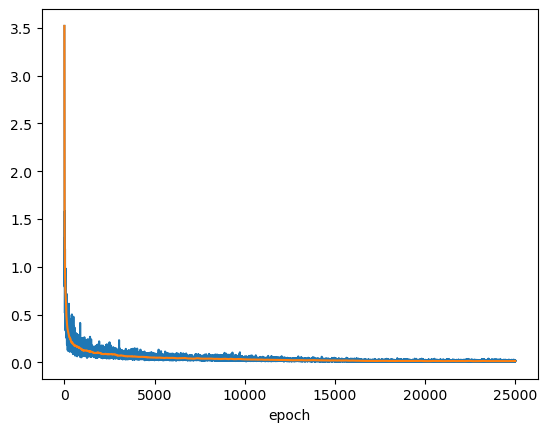

In [638]:
plt.plot(history.history['loss'])
plt.plot(lisse)
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

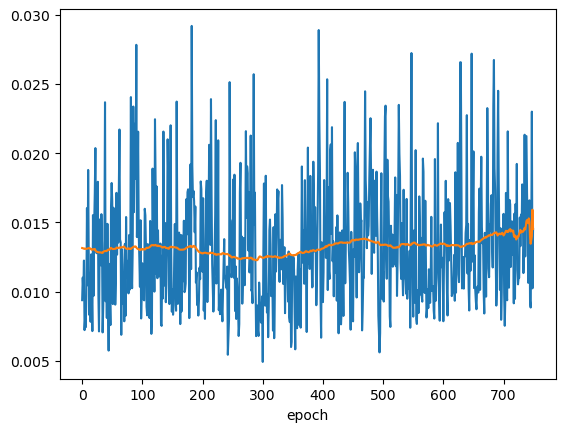

In [639]:
plt.plot(history.history['loss'][-750:])
plt.plot(lisse[-750:])
plt.xlabel('epoch')

In [640]:
np.min(history.history['loss'])

0.004616045858711004

In [641]:
print(model.predict(X_test))
print(Y_test)

143/143 [==============================] - 0s 2ms/step
[[7.7547054]
 [7.8333654]
 [7.474367 ]
 ...
 [7.883792 ]
 [7.765238 ]
 [7.685425 ]]
29       8.16
30       7.09
31       7.38
32       7.43
33       6.42
         ... 
13004    5.67
13019    7.05
13045    6.01
13047    5.27
13079    5.26
Name: Rating, Length: 4572, dtype: float64


In [419]:
print(X_test.shape)
#model.predict(X_test.iloc[0])

print(X_test.iloc[0].shape)

(4572, 2249)
(2249,)


In [642]:
for index in range(0, 30
): 
    test = X_test.to_numpy()
    test = test[index].reshape(1, 2249)
    print(model.predict(test))
    print(Y_test.iloc[index])

1/1 [==============================] - 0s 43ms/step
[[7.7546387]]
8.16
1/1 [==============================] - 0s 17ms/step
[[7.8332567]]
7.09
1/1 [==============================] - 0s 17ms/step
[[7.4743423]]
7.38
1/1 [==============================] - 0s 18ms/step
[[7.3940983]]
7.43
1/1 [==============================] - 0s 18ms/step
[[7.7378187]]
6.42
1/1 [==============================] - 0s 19ms/step
[[8.281637]]
7.31
1/1 [==============================] - 0s 18ms/step
[[7.8953047]]
7.21
1/1 [==============================] - 0s 18ms/step
[[7.797287]]
7.19
1/1 [==============================] - 0s 17ms/step
[[8.146116]]
6.6
1/1 [==============================] - 0s 25ms/step
[[7.8671265]]
5.97
1/1 [==============================] - 0s 29ms/step
[[7.979286]]
8.37
1/1 [==============================] - 0s 17ms/step
[[8.524599]]
7.11
1/1 [==============================] - 0s 17ms/step
[[8.1823845]]
7.53
1/1 [==============================] - 0s 17ms/step
[[7.4536896]]
7.76
1/1 [=======

In [604]:

def lissage(signal_brut,L):

    res = np.copy(signal_brut) # duplication des valeurs

    for i in range (1,len(signal_brut)-1): # toutes les valeurs sauf la première et la dernière

        L_g = min(i,L) # nombre de valeurs disponibles à gauche

        L_d = min(len(signal_brut)-i-1,L) # nombre de valeurs disponibles à droite

        Li=min(L_g,L_d)

        res[i]=np.sum(signal_brut[i-Li:i+Li+1])/(2*Li+1)

    return res


# signal_lisse est le tableau des valeurs lissées avec une moyenne glissante de largeur 2x10
6
lisse = lissage(history.history['loss'],10)

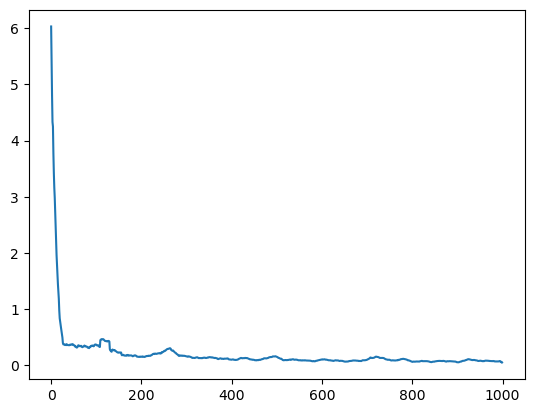

In [605]:

plt.plot(lisse)